## Section 01: Business Objective understanding and High-level Approach

### Conduct Data Quality checks and EDA to report findings 
▪ Find a suitable approach to solve the problem 

▪ Feature Engineer to create new variables

▪ Generate summaries using a combination of variables that help address the problem

▪ Make final recommendations to address the Business Problem 

▪ Summarizing the entire activity in a 1-slide case study format

Question and Answers
* What is the Purchase behavior of the customers on different products?
* How much time customer spends time on different products?
* At what rate customers can purchase products after spending much time?
* Number of purchases made through websites?
* Number of purchases in stores?
* Which factors influence the customer on product purchasing?
* What are the different types of products purchased by customer at high rate?
* On which products kids and teenagers shows thier interest?
* How marital status influence the purchasing rate?
* On which products cutstomers complaigning in a higher rate?
* How campainging influence the customer?
* what are the different type customers contacted recently?
* What are the types of different products purchased by customers at a higher rate?

In [1]:
import pandas as pd
import numpy 
import random
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns

#### Changing the working directory

In [3]:
os.chdir(r'C:\Users\SUBRAHMANYAM\Downloads\data')

#### List all the files in the directory

In [4]:
os.listdir()

['.jovianrc', '01 Super Mart Case Study Data.xlsx']

In [5]:
customers_data = pd.read_excel('01 Super Mart Case Study Data.xlsx', sheet_name='Data')

In [6]:
customers_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-07-03,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-03-12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


#### First five rows of the data

In [7]:
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04,0,6,...,2,7,1,0,0,0,0,1,0,SP


#### Last five rows of the column

In [8]:
customers_data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,2013-07-03,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,2012-03-12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,2012-01-09,99,169,...,4,7,0,1,1,0,0,1,0,CA


#### Shape of the data frame

In [9]:
customers_data.shape

(2240, 28)

* Rows - 2240
* Columns - 28

### Duplicate values

In [10]:
customers_data.duplicated().sum()

0

#### Names of all columns

In [11]:
customers_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [12]:
for i in customers_data.columns:
    print(i)

ID
Year_Birth
Education
Marital_Status
 Income 
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Response
Complain
Country


#### Information of the given data

In [13]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### From info attribute
* Data rows - 2240
* Data columns - 28
* Data types of every column:
    - Int = 23
    - Object =  4
    - Date time = 1

## The columns which has object variables

In [14]:
object_var = customers_data.select_dtypes(include='object').columns
object_var

Index(['Education', 'Marital_Status', ' Income ', 'Country'], dtype='object')

In [15]:
for i in object_var:
    print(i)

Education
Marital_Status
 Income 
Country


 * The income variable read in an incorrect foramt that is object type.
 * We must change the data type of income into integer type or float type 

### 01 - Conversion of income variable from object to Float type

In [16]:
obj_income = customers_data[' Income ']

In [17]:
obj_income.head()

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name:  Income , dtype: object

In [18]:
customers_data['Income'] = pd.to_numeric(obj_income.replace('[^0-9\.-]', '', regex=True))

In [19]:
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,84835.0
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,57091.0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,67267.0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05,0,10,...,7,0,0,0,0,0,0,0,AUS,32474.0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04,0,6,...,7,1,0,0,0,0,1,0,SP,21474.0


In [20]:
customers_data.shape

(2240, 29)

 * Now there are 29 columns
 * Because we added another column Income which is the modification of income variable

In [21]:
customers_data.drop(labels=' Income ', axis = 1, inplace = True)

In [22]:
customers_data.drop(labels='ID', axis = 1, inplace  = True)

In [23]:
customers_data.drop(labels='Year_Birth', axis = 1, inplace  = True)

In [24]:
customers_data.drop(labels='Dt_Customer', axis = 1, inplace  = True)

In [25]:
customers_data.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,Graduation,Divorced,0,0,0,189,104,379,111,189,...,1,0,0,0,0,0,1,0,SP,84835.0
1,Graduation,Single,0,0,0,464,5,64,7,0,...,5,0,0,0,0,1,1,0,CA,57091.0
2,Graduation,Married,0,1,0,134,11,59,15,2,...,2,0,0,0,0,0,0,0,US,67267.0
3,Graduation,Together,1,1,0,10,0,1,0,0,...,7,0,0,0,0,0,0,0,AUS,32474.0
4,Graduation,Single,1,0,0,6,16,24,11,0,...,7,1,0,0,0,0,1,0,SP,21474.0


In [26]:
customers_data.shape

(2240, 25)

## Object type variables in data frame

In [27]:
obj_var = customers_data.select_dtypes(include='object').columns
obj_var

Index(['Education', 'Marital_Status', 'Country'], dtype='object')

In [28]:
for i in obj_var:
    print(i)

Education
Marital_Status
Country


#### Observing all object type variables frequency in data frame

In [29]:
customers_data['Marital_Status'].nunique()

8

In [30]:
customers_data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [31]:
for i in obj_var:
    print(i, '\n', customers_data[i].value_counts(), '\n')

Education 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 

Marital_Status 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Country 
 SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64 



In [32]:
for i in obj_var:
    print(i, '\n', 'Number of unique values:', customers_data[i].nunique(), '\n', '% of unique values :', customers_data[i].nunique()/len(customers_data[i])*100)

Education 
 Number of unique values: 5 
 % of unique values : 0.2232142857142857
Marital_Status 
 Number of unique values: 8 
 % of unique values : 0.35714285714285715
Country 
 Number of unique values: 8 
 % of unique values : 0.35714285714285715


In [33]:
num_var = customers_data.select_dtypes(include='number').columns
num_var

Index(['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Income'],
      dtype='object')

In [34]:
for i in num_var:
    if i != 'ID':
        print(i, '\n', 'Number of unique values :', customers_data[i].nunique(), '\n', '\n', '% of unique values :', (customers_data[i].nunique()/len(customers_data[i])*100))

Kidhome 
 Number of unique values : 3 
 
 % of unique values : 0.13392857142857142
Teenhome 
 Number of unique values : 3 
 
 % of unique values : 0.13392857142857142
Recency 
 Number of unique values : 100 
 
 % of unique values : 4.464285714285714
MntWines 
 Number of unique values : 776 
 
 % of unique values : 34.64285714285714
MntFruits 
 Number of unique values : 158 
 
 % of unique values : 7.053571428571429
MntMeatProducts 
 Number of unique values : 558 
 
 % of unique values : 24.910714285714285
MntFishProducts 
 Number of unique values : 182 
 
 % of unique values : 8.125
MntSweetProducts 
 Number of unique values : 177 
 
 % of unique values : 7.9017857142857135
MntGoldProds 
 Number of unique values : 213 
 
 % of unique values : 9.508928571428571
NumDealsPurchases 
 Number of unique values : 15 
 
 % of unique values : 0.6696428571428571
NumWebPurchases 
 Number of unique values : 15 
 
 % of unique values : 0.6696428571428571
NumCatalogPurchases 
 Number of unique values

## 02- Variables having missed variables

In [35]:
customers_data.isnull().sum()

Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Income                 24
dtype: int64

 * Only Income variable has missing values = 24

#### List of variables which has missing  values

In [36]:
customers_data.columns[customers_data.isnull().any()]

Index(['Income'], dtype='object')

In [37]:
customers_data['Income'].isnull().sum()

24

In [38]:
((customers_data['Income'].isnull().sum() / len(customers_data['Income'])) *100).round(2)

1.07

 * 1.07% records have missing income values

In [39]:
customers_data['Income'].fillna(customers_data['Income'].median())

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [40]:
customers_data['Income'] = customers_data['Income'].fillna(customers_data['Income'].median())

 * Missing income data is replaced with median value

In [41]:
customers_data.isnull().sum()

Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Income                 0
dtype: int64

## variables having outliers

In [42]:
pd.set_option("display.max_columns", None)
customers_data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,52237.975446
std,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,25037.955891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000
1%,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7705.920000
5%,0.000000,0.000000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19101.050000
10%,0.000000,0.000000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24219.500000
25%,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35538.750000
50%,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51381.500000
75%,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68289.750000


In [43]:
sns.set_theme()

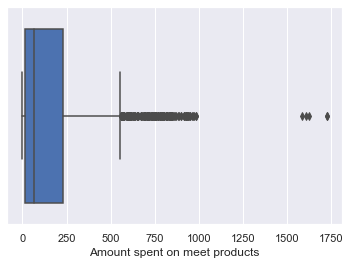

In [44]:
sns.boxplot(data = customers_data, x = 'MntMeatProducts', saturation=5.0);
plt.xlabel('Amount spent on meet products');

In [45]:
Upper_limit = 1.5*(customers_data['MntMeatProducts'].quantile(0.75)-customers_data['MntMeatProducts'].quantile(0.25)) +customers_data['MntMeatProducts'].quantile(0.75)
Upper_limit

556.0

In [46]:
meat_upper_outliers = (customers_data['MntMeatProducts']>556.0).sum()
meat_upper_outliers

175

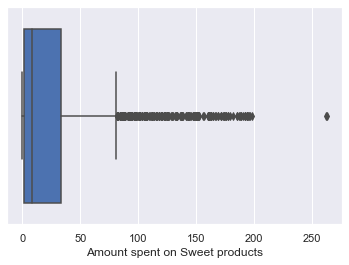

In [47]:
sns.boxplot(data = customers_data, x = 'MntSweetProducts', saturation=5.0);
plt.xlabel('Amount spent on Sweet products');

In [48]:
Upper_limit = 1.5*(customers_data['MntSweetProducts'].quantile(0.75)-customers_data['MntSweetProducts'].quantile(0.25)) +customers_data['MntSweetProducts'].quantile(0.75)
Upper_limit

81.0

In [49]:
sweet_upper_outliers = (customers_data['MntSweetProducts'] > 81.0).sum()
sweet_upper_outliers

248

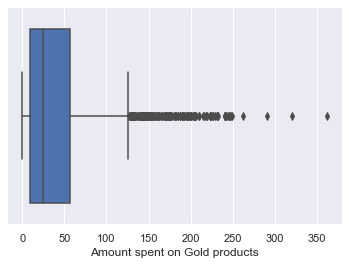

In [50]:
sns.boxplot(data = customers_data, x = 'MntGoldProds', saturation=5.0);
plt.xlabel('Amount spent on Gold products');

In [51]:
Upper_limit = 1.5*(customers_data['MntGoldProds'].quantile(0.75)-customers_data['MntGoldProds'].quantile(0.25)) +customers_data['MntGoldProds'].quantile(0.75)
Upper_limit

126.5

In [52]:
gold_upper_outiers = (customers_data['MntGoldProds'] >126.5).sum()
gold_upper_outiers

207

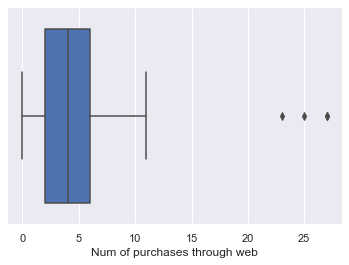

In [53]:
sns.boxplot(data = customers_data, x = 'NumWebPurchases', saturation=5.0);
plt.xlabel('Num of purchases through web');

In [54]:
Upper_limit = 1.5*(customers_data['NumWebPurchases'].quantile(0.75)-customers_data['NumWebPurchases'].quantile(0.25)) +customers_data['NumWebPurchases'].quantile(0.75)
Upper_limit

12.0

In [55]:
web_upper_outliers = (customers_data['NumWebPurchases'] > 12.0).sum()
web_upper_outliers

4

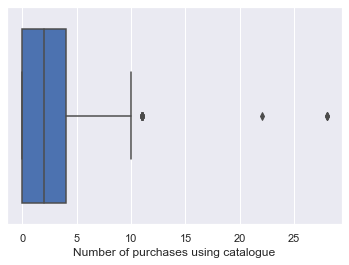

In [56]:
sns.boxplot(data = customers_data, x = 'NumCatalogPurchases', saturation=5.0);
plt.xlabel('Number of purchases using catalogue');

In [57]:
Upper_limit = 1.5*(customers_data['NumCatalogPurchases'].quantile(0.75)-customers_data['NumCatalogPurchases'].quantile(0.25)) +customers_data['NumCatalogPurchases'].quantile(0.75)
Upper_limit

10.0

In [58]:
cata_upper_outliers = (customers_data['NumCatalogPurchases'] > 10.0).sum()
cata_upper_outliers

23

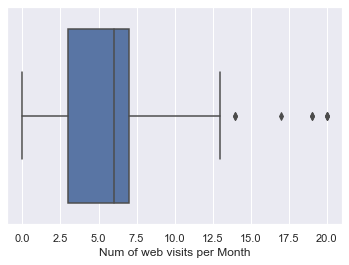

In [59]:
sns.boxplot(data = customers_data, x = 'NumWebVisitsMonth');
plt.xlabel('Num of web visits per Month');

In [60]:
Upper_limit = 1.5*(customers_data['NumWebVisitsMonth'].quantile(0.75)-customers_data['NumWebVisitsMonth'].quantile(0.25)) +customers_data['NumWebVisitsMonth'].quantile(0.75)
Upper_limit

13.0

In [61]:
(customers_data['NumWebVisitsMonth'] > 13.0).sum()

8

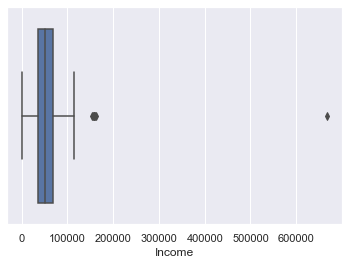

In [62]:
sns.boxplot(data = customers_data, x = 'Income');

In [63]:
Upper_limit = 1.5*(customers_data['Income'].quantile(0.75)-customers_data['Income'].quantile(0.25)) +customers_data['Income'].quantile(0.75)
Upper_limit

117416.25

In [64]:
(customers_data['Income'] > 117416.25).sum()

8

## Data cleaning

* Replacement of values

In [65]:
replace_values = customers_data.loc[:, 'AcceptedCmp3':'Complain']
replace_values.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,0,0,0,0,0,1,0
1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0


In [66]:
for i in replace_values.columns:
    print(i)

AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Response
Complain


# Exploratory Data Analysis

#### Univariate distributions on  Object Variables

In [67]:
customers_data.describe(include='object')

,Education,Marital_Status,Country
count,2240,2240,2240
unique,5,8,8
top,Graduation,Married,SP
freq,1127,864,1095


In [68]:
customers_data.select_dtypes(include='object').columns

Index(['Education', 'Marital_Status', 'Country'], dtype='object')

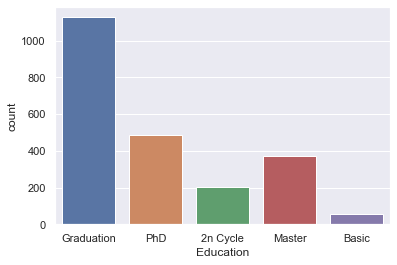

In [69]:
sns.countplot(data = customers_data, x = 'Education');

hue="who",,height=4, aspect=.7

 * Majority of the customers completed their graduation
 * Minority of customers are from Basic

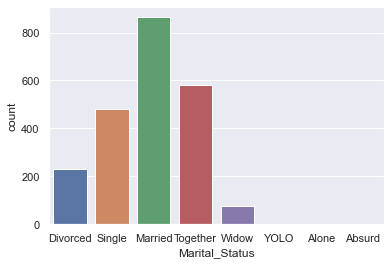

In [70]:
sns.countplot(data = customers_data, x = 'Marital_Status');

 * Majority of the customers are married and together
 * Minority of the customers are  Diverced
 * Very negligible customers are YOLo, Alone and Absurd

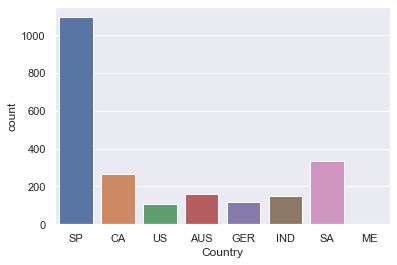

In [71]:
sns.countplot(data = customers_data, x = 'Country');

 * Majority of the customers are from SP by more than half
 * Very negligible customers are from ME

#### Univariate distributions on  Numeric Variables

In [72]:
num_var = customers_data.select_dtypes(include='number').columns

In [73]:
num_var  =customers_data.select_dtypes(include='number')

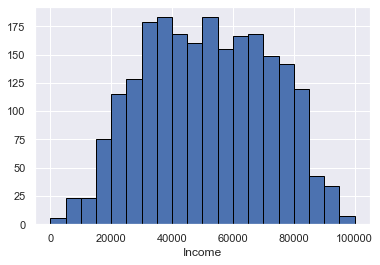

In [74]:
plt.xlabel('Income')
plt.hist(customers_data['Income'], edgecolor = 'black', range = [0, 100000], bins = 20);

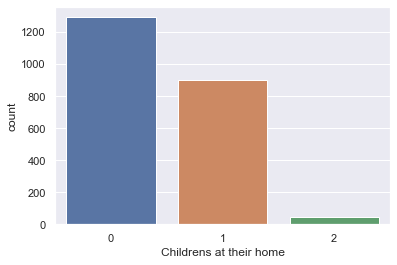

In [75]:
sns.countplot(data = customers_data, x = 'Kidhome');
plt.xlabel('Childrens at their home');

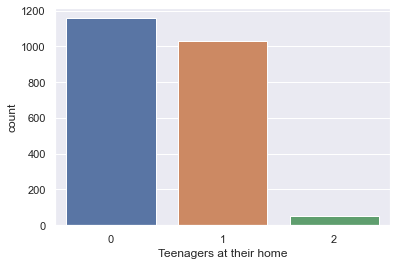

In [76]:
sns.countplot(data = customers_data, x = 'Teenhome');
plt.xlabel('Teenagers at their home');

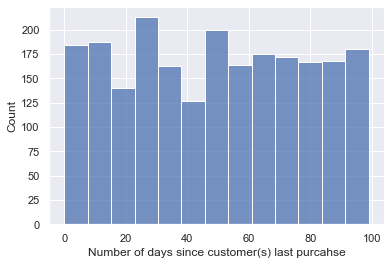

In [77]:
sns.histplot(data = customers_data, x = 'Recency');
plt.xlabel('Number of days since customer(s) last purcahse');

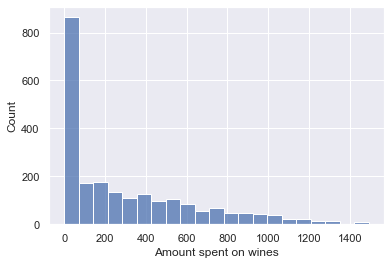

In [78]:
sns.histplot(data = customers_data, x = 'MntWines');
plt.xlabel('Amount spent on wines');

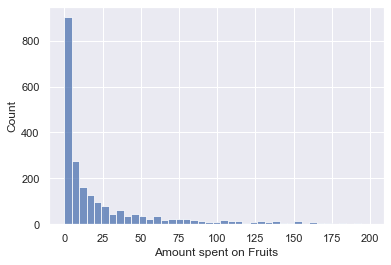

In [79]:
sns.histplot(data = customers_data, x = 'MntFruits');
plt.xlabel('Amount spent on Fruits');

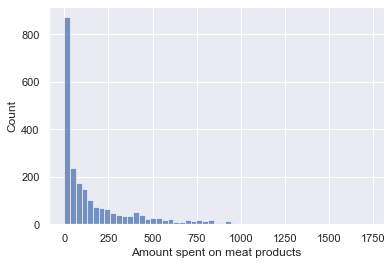

In [80]:
sns.histplot(data = customers_data, x = 'MntMeatProducts',);
plt.xlabel('Amount spent on meat products');

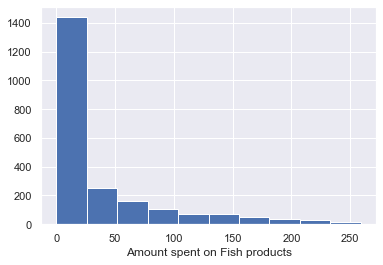

In [81]:
plt.hist(x = customers_data['MntFishProducts']);
plt.xlabel('Amount spent on Fish products');

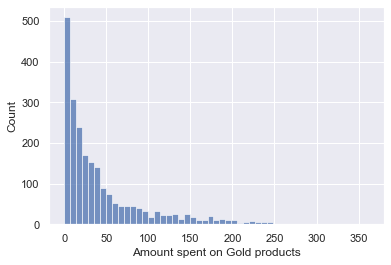

In [82]:
sns.histplot(data = customers_data, x = 'MntGoldProds');
plt.xlabel('Amount spent on Gold products');

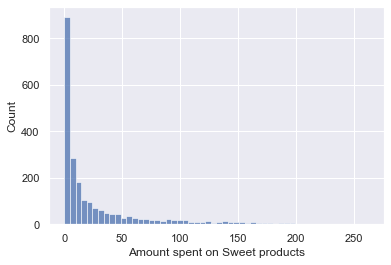

In [83]:
sns.histplot(data = customers_data, x = 'MntSweetProducts');
plt.xlabel('Amount spent on Sweet products');

Text(0.5, 0, 'Number of purchases through web')

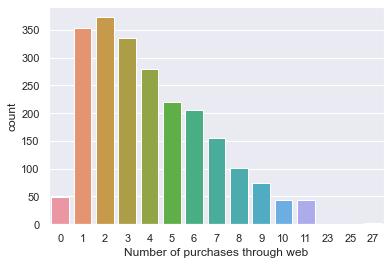

In [84]:
sns.countplot(data = customers_data, x = 'NumWebPurchases');
plt.xlabel('Number of purchases through web')

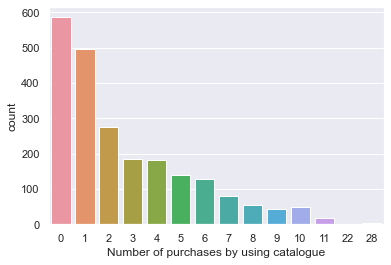

In [85]:
sns.countplot(data = customers_data, x = 'NumCatalogPurchases');
plt.xlabel('Number of purchases by using catalogue');

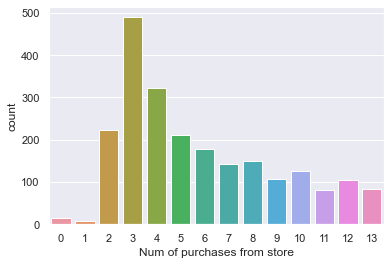

In [86]:
sns.countplot(data = customers_data, x = 'NumStorePurchases');
plt.xlabel('Num of purchases from store');

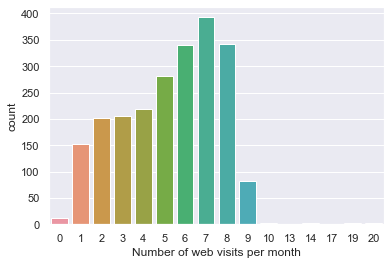

In [87]:
sns.countplot(data = customers_data, x = 'NumWebVisitsMonth');
plt.xlabel('Number of web visits per month');

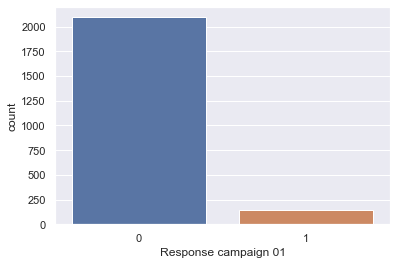

In [88]:
sns.countplot(data = customers_data, x = 'AcceptedCmp1');
plt.xlabel('Response campaign 01');

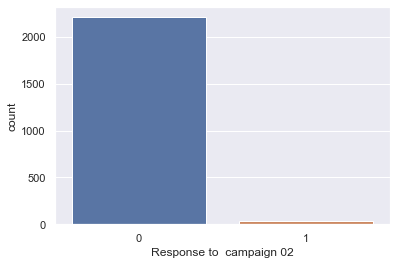

In [89]:
sns.countplot(data = customers_data, x = 'AcceptedCmp2');
plt.xlabel('Response to  campaign 02');

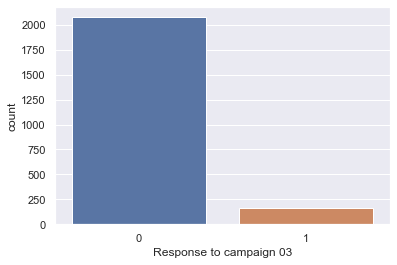

In [90]:
sns.countplot(data = customers_data, x = 'AcceptedCmp3');
plt.xlabel('Response to campaign 03');

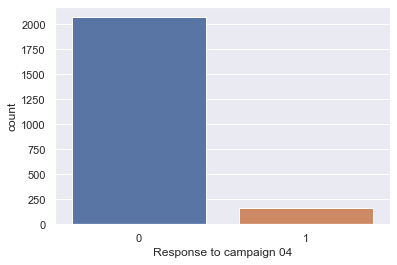

In [91]:
sns.countplot(data = customers_data, x = 'AcceptedCmp4');
plt.xlabel('Response to campaign 04');

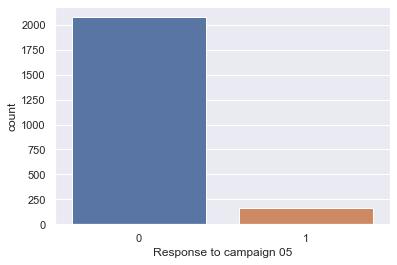

In [92]:
sns.countplot(data = customers_data, x = 'AcceptedCmp5');
plt.xlabel('Response to campaign 05');

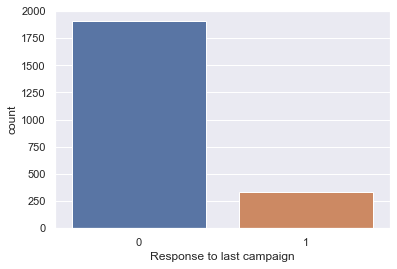

In [93]:
sns.countplot(data = customers_data, x = 'Response');
plt.xlabel('Response to last campaign');

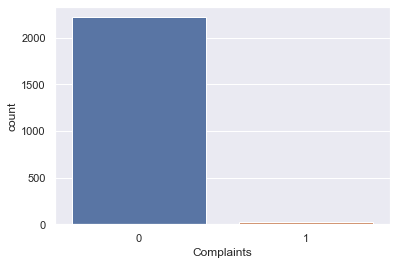

In [94]:
sns.countplot(data = customers_data, x = 'Complain');
plt.xlabel('Complaints');

# Bi-variate distributions

In [95]:
country_Accepted = customers_data.groupby('Country').agg({'AcceptedCmp1':['sum'], 'AcceptedCmp2':['sum'], 'AcceptedCmp3':['sum'], 'AcceptedCmp4':['sum'], 'AcceptedCmp5':['sum'], 'Response':['sum']}).round(2)

In [96]:
country_Accepted

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
,sum,sum,sum,sum,sum,sum
Country,,,,,,
AUS,7,0,9,6,13,23
CA,18,6,18,24,21,38
GER,7,2,10,11,8,17
IND,7,2,13,11,6,13
ME,0,0,1,0,0,2
SA,20,4,21,20,21,52
SP,78,16,83,89,89,176
US,7,0,8,6,5,13


In [97]:
country_Accepted.columns = ['Accepted_Campaign 01', 'Accepted_Campaign 02', 'Accepted_Campaign 03', 'Accepted_Campaign 04', 'Accepted_Campaign 05', 'Response to last campaign']

In [98]:
country_Accepted

,Accepted_Campaign 01,Accepted_Campaign 02,Accepted_Campaign 03,Accepted_Campaign 04,Accepted_Campaign 05,Response to last campaign
Country,,,,,,
AUS,7,0,9,6,13,23
CA,18,6,18,24,21,38
GER,7,2,10,11,8,17
IND,7,2,13,11,6,13
ME,0,0,1,0,0,2
SA,20,4,21,20,21,52
SP,78,16,83,89,89,176
US,7,0,8,6,5,13


In [99]:
campaign_response = pd.crosstab(customers_data['Response'], customers_data['Country'], margins=True)

In [100]:
campaign_response

Country,AUS,CA,GER,IND,ME,SA,SP,US,All
Response,,,,,,,,,
0,137,230,103,135,1,285,919,96,1906
1,23,38,17,13,2,52,176,13,334
All,160,268,120,148,3,337,1095,109,2240


In [101]:
data_to_excel  = pd.ExcelWriter('campaign_response.xlsx')
campaign_response.to_excel(data_to_excel)
data_to_excel.save()

In [102]:
Store_Products = customers_data.groupby('NumStorePurchases').agg({'MntWines':'sum', 'MntFruits':'sum', 'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum'})

In [103]:
Store_Products

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
NumStorePurchases,,,,,,
0,175,37,5138,24,553,715
1,466,37,3325,44,15,601
2,3299,579,2364,960,688,3301
3,14838,1978,8295,2950,1985,7468
4,62424,5399,30739,7790,5647,11003
5,82403,6219,45932,10182,6245,11719
6,77461,6887,41036,9771,6223,10437
7,61962,6096,37237,7548,6024,8219
8,71122,5876,36737,8144,6297,10254


In [104]:
customers_data.groupby('NumWebPurchases').agg({'MntWines':'sum', 'MntFruits':'sum', 'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum'})

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
NumWebPurchases,,,,,,
0,629,99,8515,100,78,210
1,6342,886,3838,1556,893,3223
2,48249,4591,22753,6973,4321,9002
3,75280,8137,53181,12381,7715,13526
4,111337,10975,71247,15490,11374,15788
5,105404,9702,65355,12900,10211,14531
6,89347,8345,51583,10723,8603,12307
7,81219,5408,38069,9106,5802,10059
8,54033,3699,22912,5424,4072,7193


In [105]:
customers_data.groupby('NumDealsPurchases').agg({'MntWines':'sum', 'MntFruits':'sum', 'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum', 'MntGoldProds':'sum'})

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
NumDealsPurchases,,,,,,
0,24188,2504,20144,3142,3302,3519
1,317011,32976,225490,47855,33270,42123
2,115829,9569,45027,14131,9555,19457
3,80201,5248,30384,7853,5662,11538
4,55437,3640,19049,4543,3721,7828
5,32960,2019,10936,2033,1875,4870
6,20936,1296,6718,1982,1406,3813
7,15090,918,4992,1214,535,2783
8,5975,283,1776,397,372,970


#### Number of customers accepted in first two campaigns

In [106]:
((customers_data['AcceptedCmp1'] == 1).sum()) + ((customers_data['AcceptedCmp2'] == 1).sum())

174

In [107]:
customers_data[((customers_data['AcceptedCmp1'] == 1) | (customers_data['AcceptedCmp2'] == 1))]

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
1,Graduation,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0
33,PhD,Married,0,1,1,408,0,21,0,0,17,3,7,1,7,8,0,1,0,1,0,1,0,IND,46374.0
35,PhD,Single,0,0,1,1285,21,449,106,20,20,1,4,3,4,1,0,0,1,1,0,1,0,SP,95169.0
38,PhD,Single,0,0,1,1248,16,349,43,16,16,1,2,4,9,4,0,1,1,1,1,1,0,SP,84865.0
41,PhD,Married,0,1,1,1200,0,204,38,29,14,3,11,9,12,6,0,0,0,1,0,0,0,SP,66465.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,Graduation,Divorced,0,0,95,737,21,106,55,63,210,0,6,7,9,3,0,0,0,1,0,0,0,SP,71847.0
2182,Graduation,Together,0,2,97,734,26,70,11,44,17,2,6,3,4,4,0,0,0,1,0,0,0,SP,63404.0
2207,Graduation,Together,0,0,98,997,15,414,99,30,76,1,5,6,12,2,0,1,1,0,1,0,0,SP,84906.0
2208,Graduation,Together,0,0,98,997,15,414,99,30,76,1,5,6,12,2,0,1,1,0,1,0,0,GER,84906.0


## Deliverables - 02

In [108]:
customers_data.columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country',
       'Income'],
      dtype='object')

#### Average and median for each web visit

In [109]:
cust_last_month_web = customers_data[customers_data['NumWebVisitsMonth'] !=0]

In [110]:
cust_last_month_web

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income
0,Graduation,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0
1,Graduation,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0
2,Graduation,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0
3,Graduation,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0
4,Graduation,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,66476.0
2236,2n Cycle,Married,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,31056.0
2237,Graduation,Divorced,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,46310.0
2238,Graduation,Married,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,65819.0


In [111]:
cust_last_month_web.shape

(2229, 25)

In [112]:
web_visits_purchases = cust_last_month_web.groupby('NumWebVisitsMonth').agg({'NumWebPurchases':['mean', 'median']}).round(2)

In [113]:
web_visits_purchases

NumWebPurchases       
                             mean median
NumWebVisitsMonth                       
1                            3.65    3.0
2                            4.22    4.0
3                            4.51    5.0
4                            4.49    5.0
5                            4.32    4.0
6                            4.27    3.0
7                            3.64    3.0
8                            3.89    3.0
9                            4.29    3.0
10                           5.33    5.0
13                           1.00    1.0
14                           0.00    0.0
17                           1.00    1.0
19                           0.00    0.0
20                           0.33    0.0

In [114]:
web_visits_purchases.columns = ['mean_num_web_purchases', 'median_num_web_purchases']

In [115]:
web_visits_purchases

,mean_num_web_purchases,median_num_web_purchases
NumWebVisitsMonth,,
1,3.65,3.0
2,4.22,4.0
3,4.51,5.0
4,4.49,5.0
5,4.32,4.0
6,4.27,3.0
7,3.64,3.0
8,3.89,3.0
9,4.29,3.0


In [116]:
data_to_excel  = pd.ExcelWriter('web_visits_purchases.xlsx')
web_visits_purchases.to_excel(data_to_excel)
data_to_excel.save()

 * The total number of customers who visited in last month are 2229
 * The average number of purchases made by customers who visited less than 10 times is 3 to 5.
 * The average number of purchases made by customers who visited more than 10 times is one or less than one.

# Comparision of average and median of ‘total spends’ based on

In [117]:
Summary = customers_data['MntWines'] + customers_data['MntFruits'] + customers_data['MntMeatProducts'] + customers_data['MntFishProducts'] + customers_data['MntSweetProducts'] + customers_data['MntGoldProds']

In [118]:
customers_data['total_spends'] = Summary

### Website visits: Customers with <10 visits versus >=10 visits

#### Customers who visits website less than 10 times :

In [119]:
customers_data.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
0,Graduation,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0,1190
1,Graduation,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,577
2,Graduation,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0,251
3,Graduation,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0,11
4,Graduation,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0,91


In [120]:
Website_visits_less_10 = customers_data[customers_data['NumWebVisitsMonth']<10]
Website_visits_less_10

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
0,Graduation,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0,1190
1,Graduation,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,577
2,Graduation,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0,251
3,Graduation,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0,11
4,Graduation,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,66476.0,689
2236,2n Cycle,Married,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,31056.0,55
2237,Graduation,Divorced,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,46310.0,309
2238,Graduation,Married,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,65819.0,1383


In [121]:
Website_visits_less_10.shape

(2228, 26)

In [122]:
Website_visits_less_10.describe().round(2)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,total_spends
count,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00,2228.00
mean,0.44,0.51,49.14,305.27,26.42,167.74,37.71,27.19,44.08,2.31,4.10,2.68,5.82,5.26,0.07,0.07,0.07,0.06,0.01,0.15,0.01,52456.20,608.42
std,0.54,0.54,28.96,336.96,39.85,226.06,54.72,41.35,52.04,1.88,2.77,2.93,3.24,2.30,0.26,0.26,0.26,0.25,0.12,0.36,0.10,24911.59,602.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2447.00,6.00
25%,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35749.75,69.00
50%,0.00,0.00,49.00,176.50,8.00,68.00,12.00,8.00,24.50,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51381.50,400.50
75%,1.00,1.00,74.00,505.00,33.00,233.25,50.00,34.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,68413.25,1048.25
max,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,666666.00,2525.00


In [123]:
web_total_average = Website_visits_less_10.groupby('NumWebVisitsMonth').agg({'total_spends':['mean', 'sum']}).round(2)

In [124]:
web_total_average.columns = ['mean_total_spends', 'sum_total_spends']

In [125]:
web_total_average

,mean_total_spends,sum_total_spends
NumWebVisitsMonth,,
0,1031.00,11341
1,1242.92,190167
2,1186.35,239642
3,973.95,199659
4,650.46,141800
5,521.06,146419
6,485.47,165059
7,297.17,116787
8,353.12,120768


In [126]:
datatoexcel = pd.ExcelWriter('web_total_average.xlsx')
web_total_average.to_excel(datatoexcel)
datatoexcel.save()

 * Average amount of spent by every customer who visited the website less than 10 times is 608.42
 * Median of total spends of customers who visited less than 10 times is 400.50

In [127]:
Website_visits_more_10 = customers_data[customers_data['NumWebVisitsMonth'] >= 10]
Website_visits_more_10

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
60,Master,Single,0,0,2,67,11,26,4,3,262,0,1,0,1,17,0,0,0,0,0,0,0,SP,6560.0,373
299,Graduation,Married,0,1,12,12,4,7,1,3,5,0,1,0,0,13,0,0,0,0,0,0,0,IND,5305.0,32
365,Master,Single,1,0,15,88,10,46,2,3,64,4,5,1,2,10,0,0,0,0,0,1,0,SP,21888.0,213
456,Graduation,Divorced,0,0,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,0,SA,4861.0,6
638,Master,Together,1,0,27,284,0,52,8,3,20,4,9,0,4,10,0,0,0,0,0,0,0,SP,30538.0,367
663,PhD,Married,1,1,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,SP,4023.0,9
1291,Graduation,Single,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,IND,3502.0,5
1416,Graduation,Single,0,0,62,73,18,66,7,12,2,15,0,1,0,19,0,0,0,0,0,0,0,SP,8028.0,178
1466,Graduation,Divorced,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,0,SP,1730.0,8
1533,PhD,Together,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,US,5648.0,49


In [128]:
Website_visits_more_10.shape

(12, 26)

In [129]:
Website_visits_more_10.describe().round(2)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,total_spends
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.0,12.0,12.0,12.0,12.00,12.0,12.00,12.00
mean,0.50,0.33,43.67,56.83,4.50,19.67,2.58,2.83,32.92,4.58,1.58,0.17,0.83,15.50,0.08,0.0,0.0,0.0,0.0,0.08,0.0,11720.50,119.33
std,0.52,0.49,29.44,80.93,5.73,22.72,2.54,3.24,74.26,6.44,2.75,0.39,1.27,4.15,0.29,0.0,0.0,0.0,0.0,0.29,0.0,12698.43,136.65
min,0.00,0.00,2.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,10.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1730.00,5.00
25%,0.00,0.00,18.75,4.25,0.75,2.50,1.00,1.00,1.00,0.00,0.00,0.00,0.00,12.25,0.00,0.0,0.0,0.0,0.0,0.00,0.0,4651.50,8.75
50%,0.50,0.00,42.50,20.50,1.50,9.50,1.50,2.50,8.50,1.00,0.50,0.00,0.00,15.50,0.00,0.0,0.0,0.0,0.0,0.00,0.0,6104.00,52.00
75%,1.00,1.00,65.75,76.75,7.00,31.00,3.25,3.00,14.75,6.75,1.25,0.00,1.25,19.25,0.00,0.0,0.0,0.0,0.0,0.00,0.0,11493.00,186.75
max,1.00,1.00,92.00,284.00,18.00,66.00,8.00,12.00,262.00,15.00,9.00,1.00,4.00,20.00,1.00,0.0,0.0,0.0,0.0,1.00,0.0,41728.00,373.00


 * Average amount spent by every customer who visited the website more than 10 times is 119.33
 * Median of the total spendings of customer who visited website more than 10 times is 52.00


In [130]:
Website_visits_more_10['NumDealsPurchases'].sum()

55

In [131]:
round((608.42-119.33), 2)

489.09

In [132]:
round(((119.33/608.42)*100), 2)

19.61

#### Comparision:

### Store purchases: Customers with <10 purchases versus >=10 purchases

#### Customers with <10 purchases

In [133]:
Cust_less_10_store_purch = customers_data[customers_data['NumStorePurchases']<10]

In [134]:
Cust_less_10_store_purch.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
0,Graduation,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0,1190
1,Graduation,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,577
2,Graduation,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0,251
3,Graduation,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0,11
4,Graduation,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0,91


In [135]:
Cust_less_10_store_purch.shape

(1846, 26)

In [136]:
Cust_less_10_store_purch.describe().round(2)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,total_spends
count,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00,1846.00
mean,0.52,0.51,48.92,237.57,20.42,132.74,29.76,21.19,38.59,2.35,3.74,2.18,4.60,5.63,0.08,0.06,0.05,0.05,0.01,0.15,0.01,48345.58,480.26
std,0.55,0.54,29.10,306.59,35.00,210.51,49.46,37.22,49.66,1.95,2.76,2.81,2.12,2.38,0.27,0.24,0.23,0.22,0.10,0.36,0.10,25464.49,560.58
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1730.00,5.00
25%,0.00,0.00,24.00,17.00,1.00,12.00,2.00,1.00,7.00,1.00,2.00,0.00,3.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32882.25,57.00
50%,0.00,0.00,49.00,91.00,5.00,39.00,8.00,6.00,20.00,2.00,3.00,1.00,4.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,46001.50,217.50
75%,1.00,1.00,74.00,370.75,21.75,140.00,30.75,21.00,46.00,3.00,5.00,3.00,6.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62486.75,754.75
max,2.00,2.00,99.00,1493.00,194.00,1725.00,258.00,263.00,362.00,15.00,27.00,28.00,9.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,666666.00,2486.00


 * The mean avegare of total spends of customers who are purchased less than 10 times in a store is 480.26
 * The median of the total spends of customers who purchased less than 10 times in a store is 217.50

### Customers with >=10 purchases

In [137]:
Cust_greater_10_store_purch = customers_data[customers_data['NumStorePurchases']>=10]

In [138]:
Cust_greater_10_store_purch.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
10,2n Cycle,Married,0,0,0,450,26,535,73,98,26,1,5,6,10,1,0,0,0,0,0,0,0,US,81044.0,1208
36,2n Cycle,Married,0,0,1,71,22,112,138,89,29,1,2,3,13,1,0,0,0,0,0,0,0,SP,65370.0,461
39,Graduation,Married,0,1,1,378,0,189,97,172,172,2,5,5,12,3,0,0,0,0,0,0,0,SP,61314.0,1008
41,PhD,Married,0,1,1,1200,0,204,38,29,14,3,11,9,12,6,0,0,0,1,0,0,0,SP,66465.0,1485
58,Graduation,Married,0,0,2,318,8,407,150,35,8,1,2,8,13,0,0,0,0,0,0,0,0,SA,83715.0,926


In [139]:
Cust_greater_10_store_purch.shape

(394, 26)

In [140]:
Cust_greater_10_store_purch.describe().round(2)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,total_spends
count,394.0,394.00,394.00,394.0,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00
mean,0.1,0.50,49.99,614.9,53.86,327.24,73.89,54.60,69.47,2.20,5.70,4.91,11.37,3.84,0.05,0.13,0.16,0.12,0.03,0.14,0.01,70474.93,1193.96
std,0.3,0.55,28.35,294.2,48.36,225.74,62.52,47.76,56.04,1.86,2.28,2.32,1.14,2.09,0.22,0.34,0.36,0.32,0.18,0.35,0.10,11080.05,412.61
min,0.0,0.00,0.00,71.0,0.00,45.00,0.00,0.00,0.00,0.00,2.00,2.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,42000.00,449.00
25%,0.0,0.00,25.00,387.0,17.25,151.25,25.00,19.00,28.00,1.00,4.00,3.00,10.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62816.50,902.25
50%,0.0,0.00,51.00,556.0,38.00,255.50,57.00,38.00,49.00,1.00,6.00,5.00,11.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,69915.50,1126.50
75%,0.0,1.00,72.75,825.5,80.00,432.00,111.00,82.00,101.00,3.00,7.00,7.00,12.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78497.00,1438.00
max,2.0,2.00,99.00,1486.0,199.00,968.00,259.00,192.00,246.00,13.00,11.00,11.00,13.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,105471.00,2525.00


 * The mean average of total spendings of customers who purchased more than 10 times from store is 1193.96
 * The median of total spendings of customers who purchased more than 10 times from store is 1126.50

In [141]:
round((1193.96-480.26), 2)

713.7

In [142]:
round(((480.26/1193.96)*100), 2)

40.22

#### Comparision :

## Discount purchases: Customers with <10 purchases versus >=10 purchases

#### Customers with less than 10 purchases with discount

In [143]:
Cust_less_10_discount_purch = customers_data[customers_data['NumDealsPurchases']<10]

In [144]:
Cust_less_10_discount_purch.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
0,Graduation,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0,1190
1,Graduation,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,577
2,Graduation,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0,251
3,Graduation,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0,11
4,Graduation,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0,91


In [145]:
Cust_less_10_discount_purch['NumDealsPurchases'].sum()

4911

In [146]:
Cust_less_10_discount_purch.shape

(2216, 26)

In [147]:
Cust_less_10_discount_purch.describe().round(2)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,total_spends
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,0.44,0.50,49.22,302.70,26.42,164.98,37.59,27.02,43.92,2.22,4.08,2.63,5.78,5.29,0.07,0.07,0.07,0.06,0.01,0.15,0.01,52174.61,602.63
std,0.54,0.54,28.91,336.61,39.91,219.87,54.66,41.28,52.18,1.62,2.77,2.80,3.24,2.37,0.26,0.26,0.26,0.25,0.12,0.36,0.10,24862.44,602.59
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3502.00,5.00
25%,0.00,0.00,24.00,23.00,2.00,15.75,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35434.75,68.00
50%,0.00,0.00,50.00,172.50,8.00,66.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51381.50,389.00
75%,1.00,1.00,74.00,504.00,33.00,231.25,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,68363.25,1042.25
max,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,9.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,666666.00,2525.00


 * The mean avegare of total spends of customers who are purchased products with a discount 602.63
 * The median of the total spends of customers  who are purchased products with a discount is 389.00

#### Customers with 10 or more than 10  purchases with discount

In [148]:
Cust_greater_10_discount_purch = customers_data[customers_data['NumDealsPurchases']>=10]

In [149]:
Cust_greater_10_discount_purch.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
26,Graduation,Together,1,1,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,0,0,0,SP,54450.0,684
27,Graduation,Together,1,1,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,0,0,0,SP,54450.0,684
105,Master,Married,1,1,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,0,0,SP,62845.0,1178
106,Master,Married,1,1,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,1,0,SP,62845.0,1178
134,PhD,Married,2,1,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,51381.5,603


In [150]:
Cust_greater_10_discount_purch['NumDealsPurchases'].sum()

297

In [151]:
Cust_greater_10_discount_purch.shape

(24, 26)

In [152]:
Cust_less_10_discount_purch['MntWines'].sum()

670793

In [153]:
Cust_greater_10_discount_purch['MntWines'].sum()

10023

In [154]:
Cust_greater_10_discount_purch.describe().round(2)

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,total_spends
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.0,24.00,24.0,24.0,24.0,24.00,24.0,24.00,24.00
mean,0.83,0.92,39.12,417.62,15.58,349.12,31.58,30.75,53.75,12.38,4.88,5.71,6.58,7.75,0.0,0.12,0.0,0.0,0.0,0.25,0.0,58088.31,898.42
std,0.48,0.50,32.70,321.99,21.47,518.76,52.86,42.27,51.38,1.95,3.47,8.06,4.07,5.14,0.0,0.34,0.0,0.0,0.0,0.44,0.0,38229.57,498.91
min,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,10.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,1730.00,8.00
25%,1.00,1.00,12.50,190.75,0.00,69.75,5.50,1.75,15.25,11.00,1.50,2.00,4.00,5.75,0.0,0.00,0.0,0.0,0.0,0.00,0.0,49685.75,642.75
50%,1.00,1.00,27.50,443.50,7.50,171.00,11.00,13.00,34.00,12.00,6.00,3.00,8.00,7.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,55891.50,770.00
75%,1.00,1.00,66.75,521.00,21.50,258.75,26.50,38.25,95.50,15.00,8.00,4.25,9.00,8.00,0.0,0.00,0.0,0.0,0.0,0.25,0.0,62845.00,1196.00
max,2.00,2.00,98.00,1099.00,89.00,1725.00,223.00,150.00,176.00,15.00,9.00,28.00,12.00,20.00,0.0,1.00,0.0,0.0,0.0,1.00,0.0,160803.00,1730.00


 * The mean average of total spendings of customers who purchased more than 10 purchases with discount is 898.42
 * The median of total spendings of customers who purchased more than 10 purchases with discount is 770.00

In [155]:
round(898.42-602.63, 2)

295.79

In [156]:
round((295.79/898.42)*100, 2)

32.92

## Relationship between total spends and with different numerical variables

In [157]:
customers_data.columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country',
       'Income', 'total_spends'],
      dtype='object')

In [158]:
total_spends_every_prod = customers_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
total_spends_every_prod

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [159]:
total_spends = total_spends_every_prod.sum()

In [160]:
total_spends

1356988

In [161]:
(680816/1356988)*100

50.17111426187999

In [162]:
(58917/1356988)*100

4.341748047882517

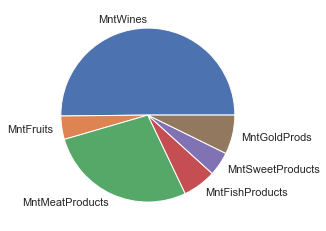

In [163]:
plt.pie(x = [680816, 58917, 373968, 84057, 60621, 98609], labels = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], )
plt.show()

In [164]:
customers_data.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
0,Graduation,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,84835.0,1190
1,Graduation,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,57091.0,577
2,Graduation,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67267.0,251
3,Graduation,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,32474.0,11
4,Graduation,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,21474.0,91


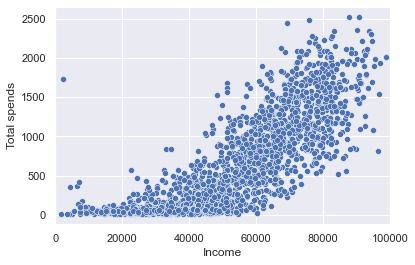

In [165]:
sns.scatterplot(data = customers_data, x = 'Income', y = 'total_spends');
plt.xlim(0, 100000);
plt.xlabel('Income');
plt.ylabel('Total spends');

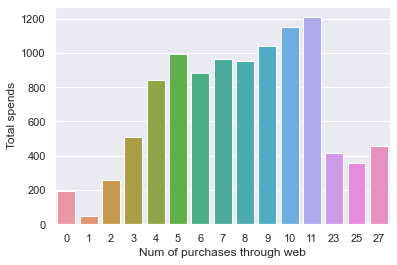

In [166]:
sns.barplot(data = customers_data, x = 'NumWebPurchases', y = 'total_spends', ci = None);
plt.xlabel('Num of purchases through web');
plt.ylabel('Total spends');

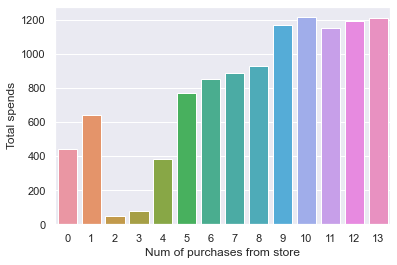

In [167]:
sns.barplot(data = customers_data, x = 'NumStorePurchases', y = 'total_spends', ci = None);
plt.xlabel('Num of purchases from store');
plt.ylabel('Total spends');

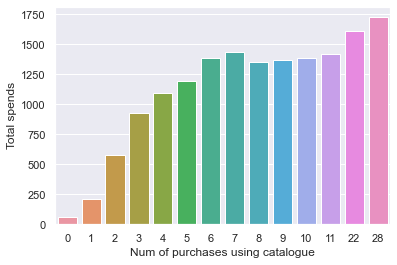

In [168]:
sns.barplot(data = customers_data, x = 'NumCatalogPurchases', y = 'total_spends', ci = None);
plt.xlabel('Num of purchases using catalogue');
plt.ylabel('Total spends');

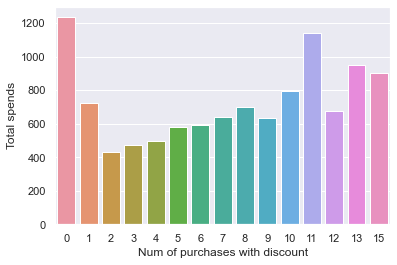

In [169]:
sns.barplot(data = customers_data, x = 'NumDealsPurchases', y = 'total_spends', ci = None);
plt.xlabel('Num of purchases with discount');
plt.ylabel('Total spends');

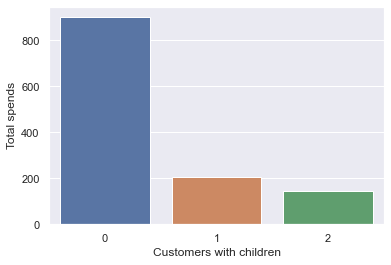

In [170]:
sns.barplot(data = customers_data, x = 'Kidhome', y = 'total_spends', ci = None);
plt.xlabel('Customers with children');
plt.ylabel('Total spends');

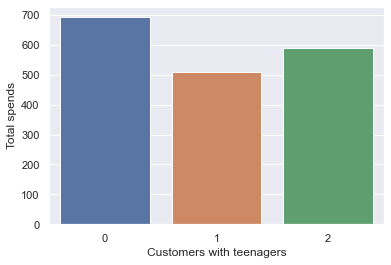

In [171]:
sns.barplot(data = customers_data, x = 'Teenhome', y = 'total_spends', ci = None);
plt.xlabel('Customers with teenagers');
plt.ylabel('Total spends');

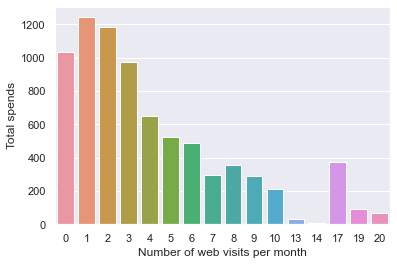

In [172]:
sns.barplot(data = customers_data, x = 'NumWebVisitsMonth', y = 'total_spends', ci = None);
plt.xlabel('Number of web visits per month');
plt.ylabel('Total spends');

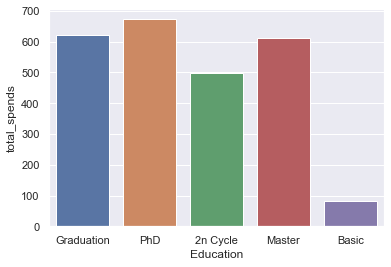

In [173]:
sns.barplot(data = customers_data, x = 'Education', y = 'total_spends', ci = None);

In [174]:
edu_total_spends = customers_data.groupby('Education').agg({'total_spends':['mean', 'median','sum']}).round(2)

In [175]:
edu_total_spends.columns = ['mean_total_spends', 'median_total_spends', 'sum_total_spends']

In [176]:
edu_total_spends.sort_values(by =  ['sum_total_spends'], ascending=False).round(2)

,mean_total_spends,median_total_spends,sum_total_spends
Education,,,
Graduation,619.90,414.0,698626
PhD,672.41,493.0,326791
Master,611.78,387.5,226359
2n Cycle,496.53,198.0,100795
Basic,81.80,57.0,4417


In [177]:
data_to_excel  = pd.ExcelWriter('edu_total_spends.xlsx')
edu_total_spends.to_excel(data_to_excel)
data_to_excel.save()

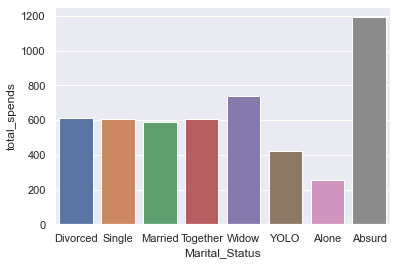

In [178]:
sns.barplot(data = customers_data, x = 'Marital_Status', y = 'total_spends', ci = None);

In [179]:
marital_total_spends = customers_data.groupby('Marital_Status').agg({'total_spends':['mean', 'median', 'sum']}).round(2)

In [180]:
marital_total_spends.columns = ['mean_total_spends', 'median_total_spends', 'sum_total_spends']

In [181]:
marital_total_spends.sort_values(by =  ['sum_total_spends'], ascending=False).round(2)

,mean_total_spends,median_total_spends,sum_total_spends
Marital_Status,,,
Married,590.80,396.5,510453
Together,608.39,393.5,352865
Single,606.48,361.0,291112
Divorced,610.63,395.0,141666
Widow,738.82,636.0,56889
Absurd,1192.50,1192.5,2385
YOLO,424.00,424.0,848
Alone,256.67,89.0,770


In [182]:
data_to_excel  = pd.ExcelWriter('marital_total_spends.xlsx')
marital_total_spends.to_excel(data_to_excel)
data_to_excel.save()

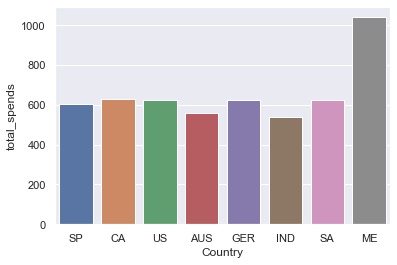

In [183]:
sns.barplot(data = customers_data, x = 'Country', y = 'total_spends', ci = None);

In [184]:
country_total_spends = customers_data.groupby('Country').agg({'total_spends':['mean', 'median', 'sum']}).round(2)

In [185]:
country_total_spends.columns = ['mean_total_spends', 'median_total_spends', 'sum_total_spends']

In [186]:
country_total_spends.sort_values(by =  ['sum_total_spends'], ascending=False).round(2)

,mean_total_spends,median_total_spends,sum_total_spends
Country,,,
SP,604.77,367.0,662220
SA,626.32,409.0,211071
CA,628.85,458.5,168532
AUS,561.02,329.5,89763
IND,537.06,291.0,79485
GER,624.28,443.0,74913
US,622.77,467.0,67882
ME,1040.67,990.0,3122


In [187]:
kid_total_spends = customers_data.groupby('Kidhome').agg({'total_spends':['sum']})

In [188]:
kid_total_spends.columns = ['sum_total_spends']

In [189]:
customers_data['total_spends'].sum()

1356988

In [190]:
round(((1165330/1356988)*100), 2)

85.88

In [191]:
kid_total_spends

,sum_total_spends
Kidhome,
0,1165330
1,184686
2,6972


In [192]:
data_to_excel  = pd.ExcelWriter('kid_total_spends.xlsx')
kid_total_spends.to_excel(data_to_excel)
data_to_excel.save()

In [193]:
teen_total_spends = customers_data.groupby('Teenhome').agg({'total_spends':['sum']})

In [194]:
teen_total_spends.columns = ['sum_total_spends']

In [195]:
teen_total_spends

,sum_total_spends
Teenhome,
0,802261
1,524091
2,30636


In [196]:
data_to_excel  = pd.ExcelWriter('teen_total_spends.xlsx')
teen_total_spends.to_excel(data_to_excel)
data_to_excel.save()

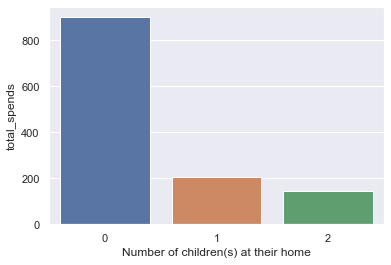

In [197]:
sns.barplot(data = customers_data, x = 'Kidhome', y  ='total_spends', ci= None);
plt.xlabel('Number of children(s) at their home');

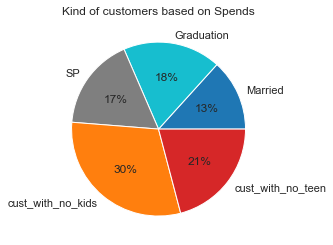

In [198]:
x = [510453, 698626, 662220, 1165330, 802261]
labels = ['Married', 'Graduation', 'SP', 'cust_with_no_kids', 'cust_with_no_teen']
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Kind of customers based on Spends')
plt.show()

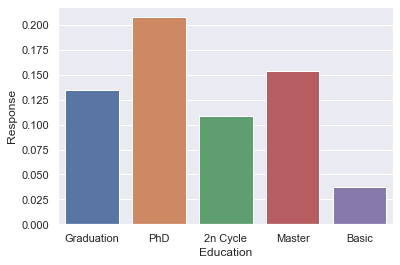

In [199]:
sns.barplot(data = customers_data, x = 'Education', y = 'Response', ci = None);

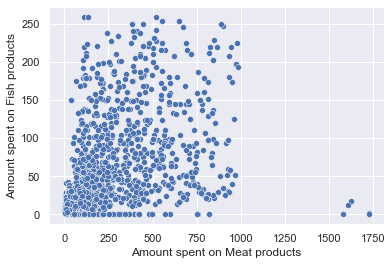

In [200]:
sns.scatterplot(data = customers_data, x = 'MntMeatProducts', y = 'MntFishProducts' );
plt.xlabel('Amount spent on Meat products');
plt.ylabel('Amount spent on Fish products');

In [201]:
customers_data.groupby('Country').agg({'Response': ['sum', 'mean', 'median']}).round(2)

Response             
             sum  mean median
Country                      
AUS           23  0.14    0.0
CA            38  0.14    0.0
GER           17  0.14    0.0
IND           13  0.09    0.0
ME             2  0.67    1.0
SA            52  0.15    0.0
SP           176  0.16    0.0
US            13  0.12    0.0

In [202]:
customers_data.groupby('Education').agg({'Response': ['sum', 'mean', 'median']}).round(2)

Response             
                sum  mean median
Education                       
2n Cycle         22  0.11    0.0
Basic             2  0.04    0.0
Graduation      152  0.13    0.0
Master           57  0.15    0.0
PhD             101  0.21    0.0

In [203]:
customers_data.groupby('Marital_Status').agg({'Response': ['sum', 'mean', 'median']}).round(2)

Response             
                    sum  mean median
Marital_Status                      
Absurd                1  0.50    0.5
Alone                 1  0.33    0.0
Divorced             48  0.21    0.0
Married              98  0.11    0.0
Single              106  0.22    0.0
Together             60  0.10    0.0
Widow                19  0.25    0.0
YOLO                  1  0.50    0.5

In [204]:
customers_data.groupby('Kidhome').agg({'Response': ['sum', 'mean', 'median']}).round(2)

Response             
             sum  mean median
Kidhome                      
0            222  0.17    0.0
1            110  0.12    0.0
2              2  0.04    0.0

In [205]:
customers_data.groupby('Teenhome').agg({'Response': ['sum', 'mean', 'median']}).round(2)

Response             
              sum  mean median
Teenhome                      
0             237  0.20    0.0
1              92  0.09    0.0
2               5  0.10    0.0

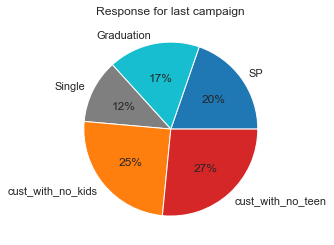

In [206]:
x = [176, 152, 106, 222, 237]
labels = ['SP', 'Graduation', 'Single', 'cust_with_no_kids', 'cust_with_no_teen']
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Response for last campaign')
plt.show()

In [207]:
edu_web = customers_data.groupby('Education').agg({'NumWebPurchases' : ['sum', 'mean', 'median']}).round(2)

In [208]:
edu_web.columns = ['sum_web_purch', 'mean_web_purch', 'median_web_purch']

In [209]:
edu_web.sort_values(by = 'sum_web_purch', ascending=False)

,sum_web_purch,mean_web_purch,median_web_purch
Education,,,
Graduation,4649,4.13,4.0
PhD,2150,4.42,4.0
Master,1492,4.03,3.0
2n Cycle,757,3.73,3.0
Basic,102,1.89,2.0


In [210]:
country_web = customers_data.groupby('Country').agg({'NumWebPurchases' : ['sum', 'mean', 'median']}).round(2)

In [211]:
country_web.columns = ['sum_web_purch', 'mean_web_purch', 'median_web_purch']

In [212]:
country_web.sort_values(by = 'sum_web_purch', ascending=False)

,sum_web_purch,mean_web_purch,median_web_purch
Country,,,
SP,4382,4.00,4.0
SA,1397,4.15,3.0
CA,1154,4.31,4.0
AUS,654,4.09,4.0
IND,584,3.95,3.0
US,484,4.44,4.0
GER,477,3.98,3.0
ME,18,6.00,6.0


In [213]:
marital_web = customers_data.groupby('Marital_Status').agg({'NumWebPurchases' : ['sum', 'mean', 'median']})

In [214]:
marital_web.columns = ['sum_web_purch', 'mean_web_purch', 'median_web_purch']

In [215]:
marital_web.sort_values(by = 'sum_web_purch', ascending=False)

,sum_web_purch,mean_web_purch,median_web_purch
Marital_Status,,,
Married,3532,4.087963,4.0
Together,2367,4.081034,4.0
Single,1859,3.872917,3.0
Divorced,1000,4.310345,4.0
Widow,356,4.623377,4.0
Alone,15,5.000000,3.0
YOLO,14,7.000000,7.0
Absurd,7,3.500000,3.5


In [216]:
kidhome_web = customers_data.groupby('Kidhome').agg({'NumWebPurchases' : ['sum']})

In [217]:
kidhome_web

,NumWebPurchases
,sum
Kidhome,
0,6431
1,2585
2,134


In [218]:
kidhome_web.columns = ['sum_web_purch']

In [219]:
kidhome_web.sort_values(by = 'sum_web_purch', ascending=False)

,sum_web_purch
Kidhome,
0,6431
1,2585
2,134


In [220]:
teen_web = customers_data.groupby('Teenhome').agg({'NumWebPurchases' : ['sum']})

In [221]:
teen_web.columns = ['sum_web_purch']

In [222]:
teen_web.sort_values(by = 'sum_web_purch', ascending=False)

,sum_web_purch
Teenhome,
1,4661
0,4240
2,249


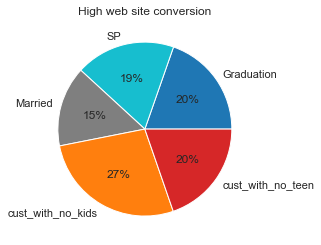

In [223]:
x = [4649, 4382, 3532, 6431, 4661]
labels = ['Graduation', 'SP', 'Married', 'cust_with_no_kids', 'cust_with_no_teen']
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('High web site conversion')
plt.show()

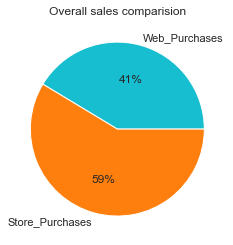

In [224]:
x = [9150, 12970]
labels = ['Web_Purchases', 'Store_Purchases']
colors = ['tab:cyan', 'tab:orange']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Overall sales comparision')
plt.show()

In [225]:
rel_fish_meat = customers_data.groupby('Marital_Status').agg({'MntMeatProducts':['sum', 'mean', 'median'], 'MntFishProducts':['sum', 'mean', 'median']})

In [226]:
rel_fish_meat

MntMeatProducts                    MntFishProducts              \
                           sum        mean median             sum        mean   
Marital_Status                                                                  
Absurd                     625  312.500000  312.5             411  205.500000   
Alone                       79   26.333333   24.0              23    7.666667   
Divorced                 34848  150.206897   71.5            8130   35.043103   
Married                 138829  160.681713   64.0           30569   35.380787   
Single                   87412  182.108333   65.0           18344   38.216667   
Together                 97500  168.103448   68.0           22615   38.991379   
Widow                    14575  189.285714   83.0            3957   51.389610   
YOLO                       100   50.000000   50.0               8    4.000000   

                       
               median  
Marital_Status         
Absurd          205.5  
Alone             4.0  
Divorced         10.0  
Married          12.0  
Single           12.0  
Together         12.0  
Widow            23.0  
YOLO              4.0

In [227]:
rel_fish_meat.columns = ['sum_meat_prod', 'mean_meat_prod', 'median_meat_prod', 'sum_fish_prod', 'mean_fish_prod', 'median_fish_prod']

In [228]:
rel_fish_meat.sort_values(by = ['sum_meat_prod', 'sum_fish_prod'], ascending = False).round(2)

,sum_meat_prod,mean_meat_prod,median_meat_prod,sum_fish_prod,mean_fish_prod,median_fish_prod
Marital_Status,,,,,,
Married,138829,160.68,64.0,30569,35.38,12.0
Together,97500,168.10,68.0,22615,38.99,12.0
Single,87412,182.11,65.0,18344,38.22,12.0
Divorced,34848,150.21,71.5,8130,35.04,10.0
Widow,14575,189.29,83.0,3957,51.39,23.0
Absurd,625,312.50,312.5,411,205.50,205.5
YOLO,100,50.00,50.0,8,4.00,4.0
Alone,79,26.33,24.0,23,7.67,4.0


In [229]:
edu_web = customers_data.groupby('Education').agg({'NumWebPurchases' : ['sum', 'mean', 'median']}).round(2)

In [230]:
customers_data.describe()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,total_spends
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,52237.975446,605.798214
std,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,25037.955891,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,5.000000
25%,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35538.750000,68.750000
50%,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51381.500000,396.000000
75%,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68289.750000,1045.500000
max,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,666666.000000,2525.000000


In [231]:
cust_more_total_sepnds = customers_data[(customers_data['total_spends']>=1045.5)]

In [232]:
cust_more_total_sepnds['total_spends'].sum()

834666

In [233]:
customers_data.groupby('Marital_Status').agg({'total_spends':['sum']})

,total_spends
,sum
Marital_Status,
Absurd,2385
Alone,770
Divorced,141666
Married,510453
Single,291112
Together,352865
Widow,56889
YOLO,848


In [234]:
discount_date = customers_data[customers_data['NumDealsPurchases']>10]
discount_date.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Income,total_spends
26,Graduation,Together,1,1,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,0,0,0,SP,54450.0,684
27,Graduation,Together,1,1,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,0,0,0,SP,54450.0,684
105,Master,Married,1,1,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,0,0,SP,62845.0,1178
106,Master,Married,1,1,3,1099,0,45,0,0,34,11,3,4,10,8,0,1,0,0,0,1,0,SP,62845.0,1178
134,PhD,Married,2,1,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER,51381.5,603


In [235]:
discount_date.shape

(19, 26)

In [236]:
customers_data.groupby('Country').agg({'NumDealsPurchases': ['mean']}).round(2)

,NumDealsPurchases
,mean
Country,
AUS,2.26
CA,2.40
GER,2.15
IND,2.47
ME,2.33
SA,2.42
SP,2.25
US,2.64


In [237]:
customers_data['MntWines'].sum()

680816

In [238]:
customers_data['MntFruits'].sum()

58917

In [239]:
customers_data['MntMeatProducts'].sum()

373968

In [240]:
customers_data['MntFishProducts'].sum()

84057

In [241]:
customers_data['MntSweetProducts'].sum()

60621

In [242]:
customers_data['MntGoldProds'].sum()

98609

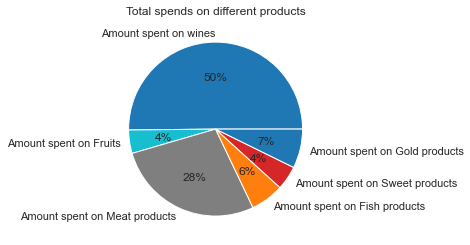

In [243]:
x = [680816, 58917, 373968, 84057, 60621, 98609]
labels = ['Amount spent on wines', 'Amount spent on Fruits', 'Amount spent on Meat products', 'Amount spent on Fish products', 'Amount spent on Sweet products', 'Amount spent on Gold products']
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Total spends on different products')
plt.show()

In [244]:
customers_data['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

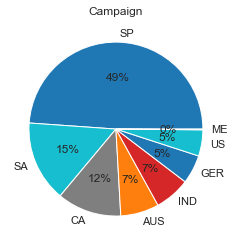

In [245]:
x = [1095, 337, 268, 160, 148, 120, 109, 3]
labels = ['SP', 'SA', 'CA', 'AUS', 'IND', 'GER', 'US', 'ME']
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Campaign')
plt.show()

In [246]:
country_response = customers_data.groupby('Country').agg({'Response':['sum', 'mean']}).round(2)
country_response

Response      
             sum  mean
Country               
AUS           23  0.14
CA            38  0.14
GER           17  0.14
IND           13  0.09
ME             2  0.67
SA            52  0.15
SP           176  0.16
US            13  0.12

In [247]:
country_response.columns = ['Total responses  to last campaign', 'Average responses to last campaign']

In [248]:
country_response

,Total responses to last campaign,Average responses to last campaign
Country,,
AUS,23,0.14
CA,38,0.14
GER,17,0.14
IND,13,0.09
ME,2,0.67
SA,52,0.15
SP,176,0.16
US,13,0.12


In [249]:
data_to_excel  = pd.ExcelWriter('country_response.xlsx')
country_response.to_excel(data_to_excel)
data_to_excel.save()

In [250]:
 customers_data.groupby('Country').agg({'NumDealsPurchases':['sum', 'mean']}).round(2)

NumDealsPurchases      
                      sum  mean
Country                        
AUS                   362  2.26
CA                    644  2.40
GER                   258  2.15
IND                   365  2.47
ME                      7  2.33
SA                    815  2.42
SP                   2469  2.25
US                    288  2.64

In [251]:
country_Accepted = customers_data.groupby('Country').agg({'AcceptedCmp1':['mean'], 'AcceptedCmp2':['mean'], 'AcceptedCmp3':['mean'], 'AcceptedCmp4':['mean'], 'AcceptedCmp5':['mean'], 'Response':['mean']})

In [252]:
country_Accepted.round(2)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
,mean,mean,mean,mean,mean,mean
Country,,,,,,
AUS,0.04,0.00,0.06,0.04,0.08,0.14
CA,0.07,0.02,0.07,0.09,0.08,0.14
GER,0.06,0.02,0.08,0.09,0.07,0.14
IND,0.05,0.01,0.09,0.07,0.04,0.09
ME,0.00,0.00,0.33,0.00,0.00,0.67
SA,0.06,0.01,0.06,0.06,0.06,0.15
SP,0.07,0.01,0.08,0.08,0.08,0.16
US,0.06,0.00,0.07,0.06,0.05,0.12


In [253]:
country_Accepted.columns = ['Accepted_Campaign 01', 'Accepted_Campaign 02', 'Accepted_Campaign 03', 'Accepted_Campaign 04', 'Accepted_Campaign 05', 'Response to last campaign']

In [254]:
country_Accepted.round(3)

,Accepted_Campaign 01,Accepted_Campaign 02,Accepted_Campaign 03,Accepted_Campaign 04,Accepted_Campaign 05,Response to last campaign
Country,,,,,,
AUS,0.044,0.000,0.056,0.038,0.081,0.144
CA,0.067,0.022,0.067,0.090,0.078,0.142
GER,0.058,0.017,0.083,0.092,0.067,0.142
IND,0.047,0.014,0.088,0.074,0.041,0.088
ME,0.000,0.000,0.333,0.000,0.000,0.667
SA,0.059,0.012,0.062,0.059,0.062,0.154
SP,0.071,0.015,0.076,0.081,0.081,0.161
US,0.064,0.000,0.073,0.055,0.046,0.119


In [255]:
data_to_excel  = pd.ExcelWriter('country_Accepted.xlsx')
country_Accepted.to_excel(data_to_excel)
data_to_excel.save()

In [256]:
complain = customers_data.groupby('Country').agg({'Complain' : ['mean']}).round(4)

In [257]:
complain.columns = ['Complaints Average']

In [258]:
complain

,Complaints Average
Country,
AUS,0.0000
CA,0.0075
GER,0.0083
IND,0.0068
ME,0.0000
SA,0.0089
SP,0.0128
US,0.0000


In [259]:
data_to_excel  = pd.ExcelWriter('complaints.xlsx')
complain.to_excel(data_to_excel)
data_to_excel.save()

In [260]:
customers_data['NumStorePurchases'].sum()

12970

In [261]:
customers_data['NumWebPurchases'].sum()

9150

In [262]:
customers_data['NumCatalogPurchases'].sum()

5963

In [263]:
12970+9150+5963

28083

In [264]:
catalogue = 5963/28083

In [265]:
catalogue

0.21233486450877756

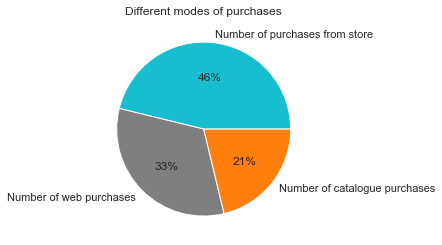

In [266]:
x = [12970, 9150, 5963]
labels = ['Number of purchases from store', 'Number of web purchases', 'Number of catalogue purchases']
colors = ['tab:cyan', 'tab:gray', 'tab:orange']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Different modes of purchases')
plt.show()